<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 40px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction To Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 04 - Data modeling
</div>

## 1. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## 2. Read data file

In [2]:
tft_df = pd.read_csv('../data/processed/Group25_TFT_processed.csv')
tft_df.head()

,Riot Games Name,Riot Games Tag Line,Summoner Level,Summoner Points,Summoner Wins,Summoner Losses,Is Veteran?,Is Inactive?,Is Fresh Blood?,Is Hot Streak?,Summoner Tier
0,Victorious,HLG,762,602,122,87,False,False,True,False,Challenger
1,mikej,VN2,221,703,231,185,False,False,True,False,Challenger
2,Duy Pingboda,9999,27,704,122,83,False,False,True,False,Challenger
3,Top1GamingTopTop,6789,1,613,115,81,False,False,True,False,Challenger
4,kobisao,VN2,380,540,82,45,False,False,True,False,Challenger


In [3]:
column = ['Riot Games Name', 'Riot Games Tag Line', 'Summoner Level', 'Is Veteran?', 'Is Inactive?', 'Is Fresh Blood?', 'Is Hot Streak?']
tft_df = tft_df.drop(column, axis = 1)
tft_df.head()

,Summoner Points,Summoner Wins,Summoner Losses,Summoner Tier
0,602,122,87,Challenger
1,703,231,185,Challenger
2,704,122,83,Challenger
3,613,115,81,Challenger
4,540,82,45,Challenger


### Data shape and types

In [4]:
tft_df.shape

(1350, 4)

In [5]:
tft_df.dtypes

Summoner Points     int64
Summoner Wins       int64
Summoner Losses     int64
Summoner Tier      object
dtype: object

In [6]:
tft_df.isna().sum()

Summoner Points    0
Summoner Wins      0
Summoner Losses    0
Summoner Tier      0
dtype: int64

## 3. Getting Data Ready

In [7]:
# Create X (features matrix)
X = tft_df.drop('Summoner Points', axis = 1) # Remove 'target' column

# Create y (lables)
y = tft_df['Summoner Points']

In [8]:
# Split data into train and test
np.random.seed(25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# One hot encoding
categorical_features = ['Summoner Tier']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                  one_hot,
                                  categorical_features)], remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

transformed_X_train = pd.DataFrame(transformed_X_train, columns=['Challenger', 'Grandmaster', 'Summoner Wins', 'Summoner Losses'])
transformed_X_test = pd.DataFrame(transformed_X_test, columns=['Challenger', 'Grandmaster', 'Summoner Wins', 'Summoner Losses'])
transformed_X_train

,Challenger,Grandmaster,Summoner Wins,Summoner Losses
0,1.0,0.0,126.0,95.0
1,0.0,1.0,244.0,211.0
2,0.0,1.0,248.0,220.0
3,0.0,1.0,81.0,56.0
4,1.0,0.0,176.0,139.0
...,...,...,...,...
1075,0.0,1.0,168.0,163.0
1076,1.0,0.0,224.0,167.0
1077,0.0,1.0,110.0,87.0
1078,1.0,0.0,174.0,135.0


In [10]:
transformed_X_train.shape, transformed_X_test.shape, y_train.shape, y_test.shape

((1080, 4), (270, 4), (1080,), (270,))

## 4. Select and Train a Model
### 4.1. Training and Evaluating on the Training Set
#### 4.1.1. Using Linear regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(transformed_X_train, y_train)

LinearRegression()

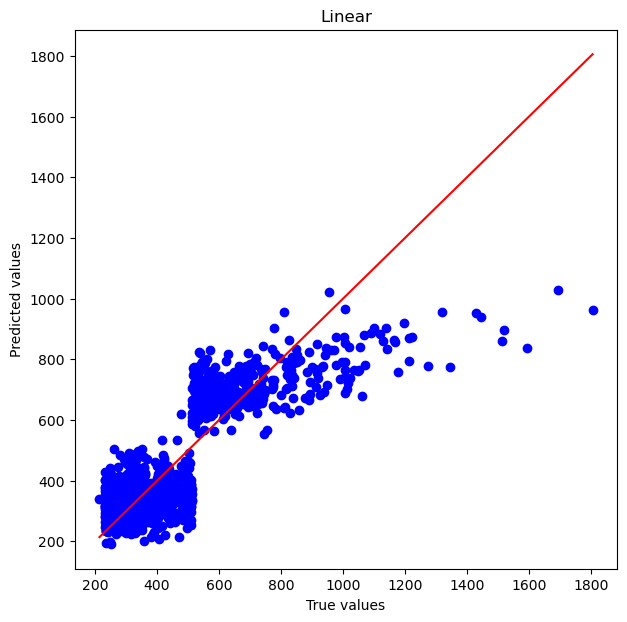

In [12]:
predicted_values = lin_reg.predict(transformed_X_train)
plt.figure(figsize=(7, 7))
plt.scatter(y_train, predicted_values, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear')
plt.show()

In [13]:
lin_mse = mean_squared_error(y_train, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

124.97101935652722

#### 4.1.2. Using Decision Tree

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=25)
tree_reg.fit(transformed_X_train, y_train)

DecisionTreeRegressor(random_state=25)

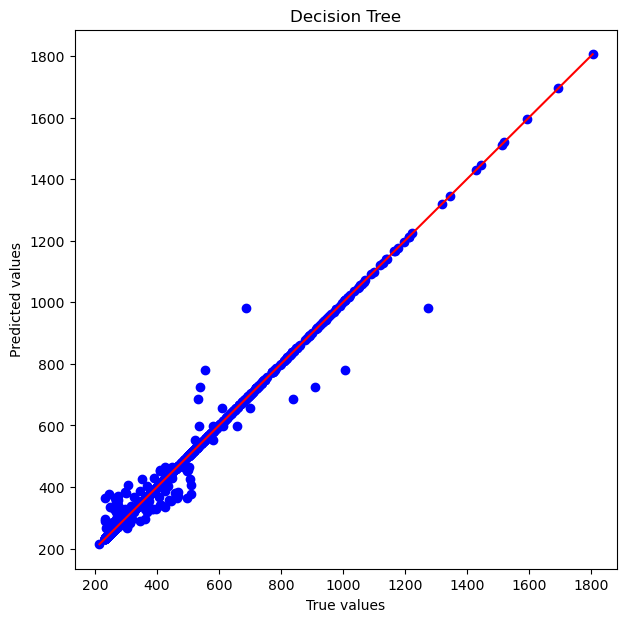

In [15]:
predicted_values = tree_reg.predict(transformed_X_train)
plt.figure(figsize=(7, 7))
plt.scatter(y_train, predicted_values, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Decision Tree')
plt.show()

In [16]:
tree_mse = mean_squared_error(y_train, predicted_values)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

25.816840613430205

#### 4.1.3. Using Random Forest

In [17]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=25)
forest_reg.fit(transformed_X_train, y_train)

RandomForestRegressor(random_state=25)

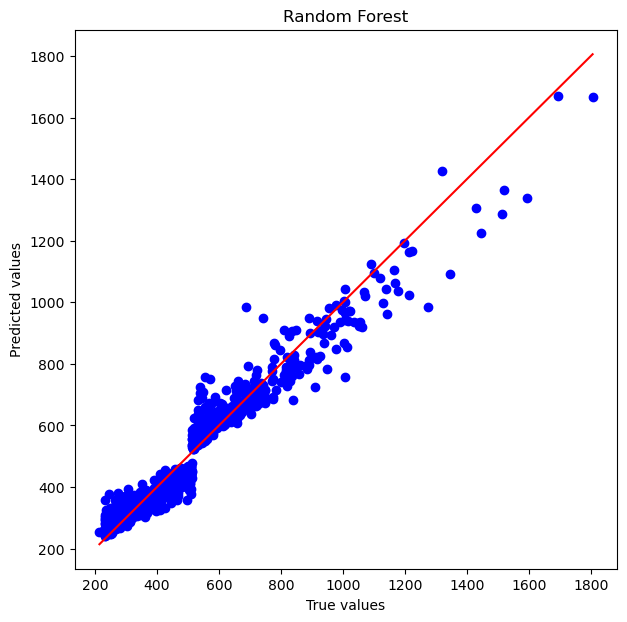

In [18]:
predicted_values = forest_reg.predict(transformed_X_train)
plt.figure(figsize=(7, 7))
plt.scatter(y_train, predicted_values, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.show()

In [19]:
forest_mse = mean_squared_error(y_train, predicted_values)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

51.453183756762265

We observed that the `Decision Tree Regressor` is exhibiting more overfitting with this dataset compared to the `Linear Regressor` and `Random Forest Regressor`, based on the mean square error and root mean square error

### 5.2. Evaluation Using Cross-Validation

In [20]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [21]:
lin_scores = cross_val_score(lin_reg, transformed_X_train, y_train,                           
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print('Linear Regressor')
display_scores(lin_rmse_scores)

Linear Regressor
Scores: [122.61113183 126.44377611 135.77237445 124.72645519 115.39173603
 133.63888162 116.35128567 119.09419385 147.93422226 110.79576582]
Mean: 125.27598228340753
Standard deviation: 10.618451080970893


In [22]:
scores = cross_val_score(tree_reg, transformed_X_train, y_train,
                         scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
print('Decision Tree Regressor')
display_scores(tree_rmse_scores)

Decision Tree Regressor
Scores: [141.10465318 156.22202713 155.42233383 147.39817578 177.3605934
 158.09898593 193.61179659 158.71128137 195.36252508 152.67373983]
Mean: 163.59661120967093
Standard deviation: 17.782890881945683


In [23]:
forest_scores = cross_val_score(forest_reg, transformed_X_train, y_train,                           
                             scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print('Random Forest Regressor')
display_scores(forest_rmse_scores)

Random Forest Regressor
Scores: [117.90038775 129.85603259 129.69984027 115.63736036 131.31657637
 132.89301981 131.49270024 125.28112506 143.33879122 115.21313008]
Mean: 127.26289637464538
Standard deviation: 8.42052990592212


### 5.3. Fine-Tune Model

In [24]:
forest_reg = RandomForestRegressor(random_state=25)

param_grid = {
    'n_estimators': [50],
    'min_samples_split': [2],
    'max_depth': np.arange(1, 50)
}

grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(transformed_X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=25),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'min_samples_split': [2], 'n_estimators': [50]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [25]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 50}

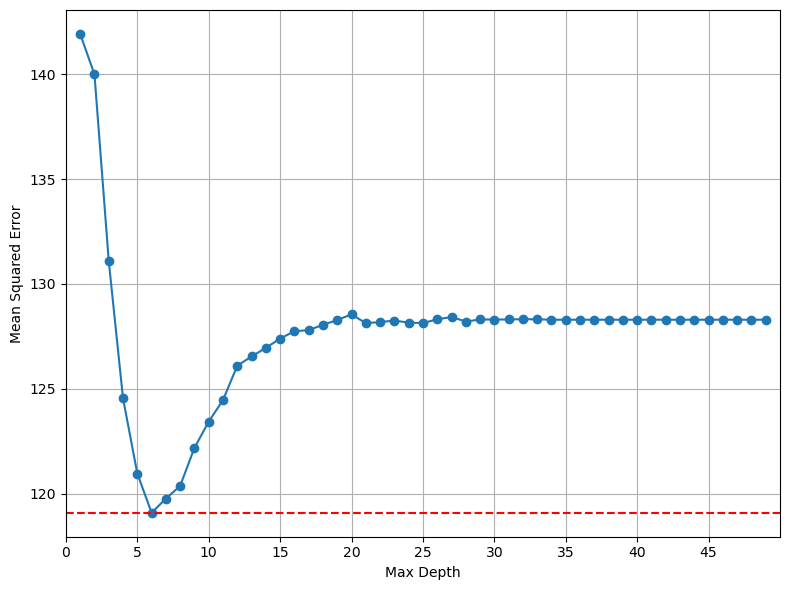

In [26]:
cvres = grid_search.cv_results_
mse_values = np.sqrt(-cvres['mean_test_score'])
params = cvres['params']
param_values = [val['max_depth'] for val in params]
plt.figure(figsize=(8, 6))
plt.plot(param_values, mse_values, marker='o', linestyle='-')
plt.axhline(y=min(mse_values), color='red', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.grid(True)

# Set custom x ticks
plt.xlim(0, 50)
x_ticks = np.arange(0, max(param_values) + 1, 5)
plt.xticks(x_ticks)
plt.tight_layout()
plt.show()